# Choroshape Census Data Examples

This script makes county-level choropleth maps that represent the amount of women of reproductive age (defined here as females 15 to 49) by proportion of county population for several U.S. states. This script demostrates one way to use Choroshape to make chorepleth maps. The script uses data from census pep API and Tiger shapefiles also from the U.S. Census site.

In [15]:
import choroshape as cshp
import datetime as dt
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import us
import json
import io
import zipfile
from six.moves.urllib.request import urlopen

%load_ext autoreload
%autoreload 2
%matplotlib inline

Sets up some variables. A census api key must be specified here, as must the output path for storing the map image files.

In [8]:
TODAY = dt.datetime.today().strftime("%m/%d/%Y")
OUTPATH = os.path.expanduser('~/Desktop/Example_Files/')
MYTOKEN =  '# Get your census api key at http://api.census.gov/data/key_signup.html

This function reads in the data from the census api and returns a pandas dataframe.

In [9]:
def census_call(url):
    '''Calls a table from the census API and creates a pandas DataFrame
    Args:
        url(str): complete url to use for the call, alread has the table_code.
            Examples can be found ont the Census API guide.
    Returns:
        df(pd.DataFrame): data in DataFrame format'''
    response = urlopen(url)
    str_response = response.read().decode('utf-8')
    data = json.loads(str_response)
    df = pd.DataFrame(data[1:], columns=data[0])
    return df

Here a dictionary is created to store slightly different style specifications for each state. Custom style can be specified through the Choroshape.ChoroplethStyle object.

In [12]:
style_dict = {}
style_dict['MA'] = cshp.ChoroplethStyle(county_colors='blues', legx=.07,
                                              legy=0.18, ttlx=.08, ttly=0.9)
style_dict['MI'] = cshp.ChoroplethStyle(county_colors='greens', legx=.07,
                                              legy=0.18, ttlx=.08, ttly=0.9)
style_dict['TX'] = cshp.ChoroplethStyle(county_colors='violets', legx=.07,
                                              legy=0.18, ttlx=.08, ttly=0.9)
style_dict['NC'] = cshp.ChoroplethStyle(county_colors='reds', legx=.07,
                                              legy=0.18, ttlx=.08, ttly=0.9)
style_dict['CO'] = cshp.ChoroplethStyle(county_colors='oranges',legx=.07,
                                              legy=.12, ttlx=.08, ttly=0.84)

Here the script is looping over the states in the style_dict and
1. Finding the specified data table
2. Filter and clean the data
3. Find the total population for each county
4. Find the total number of women age 15 to 49 for each county
5. Downloads the shapefile
6. Creates and cleans a geodataset
7. Creates an area population data object
8. Creates a style object
9. Creates a choropleth object
10. Plots the map

       AGEGRP RACE5 HISP SEX DATE    STNAME     POP state county
0           0     1    1   1    1  Colorado  120414    08    001
1           1     1    1   1    1  Colorado    8304    08    001
2           2     1    1   1    1  Colorado    7865    08    001
3           3     1    1   1    1  Colorado    7318    08    001
4           4     1    1   1    1  Colorado    6859    08    001
5           5     1    1   1    1  Colorado    7186    08    001
6           6     1    1   1    1  Colorado    9603    08    001
7           7     1    1   1    1  Colorado    9442    08    001
8           8     1    1   1    1  Colorado    9381    08    001
9           9     1    1   1    1  Colorado    8909    08    001
10         10     1    1   1    1  Colorado    9657    08    001
11         11     1    1   1    1  Colorado    9512    08    001
12         12     1    1   1    1  Colorado    8085    08    001
13         13     1    1   1    1  Colorado    6571    08    001
14         14     1    1 

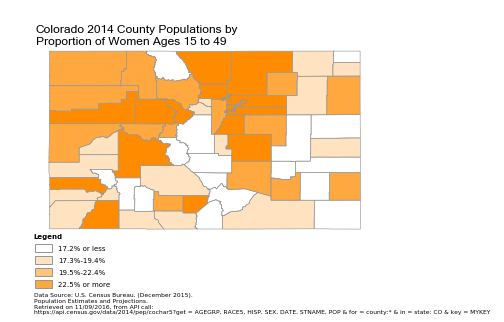

       AGEGRP RACE5 HISP SEX DATE    STNAME   POP state county
0           0     1    1   1    1  Michigan  5453    26    001
1           1     1    1   1    1  Michigan   169    26    001
2           2     1    1   1    1  Michigan   209    26    001
3           3     1    1   1    1  Michigan   241    26    001
4           4     1    1   1    1  Michigan   284    26    001
5           5     1    1   1    1  Michigan   152    26    001
6           6     1    1   1    1  Michigan   170    26    001
7           7     1    1   1    1  Michigan   158    26    001
8           8     1    1   1    1  Michigan   186    26    001
9           9     1    1   1    1  Michigan   303    26    001
10         10     1    1   1    1  Michigan   374    26    001
11         11     1    1   1    1  Michigan   464    26    001
12         12     1    1   1    1  Michigan   479    26    001
13         13     1    1   1    1  Michigan   548    26    001
14         14     1    1   1    1  Michigan   572    26

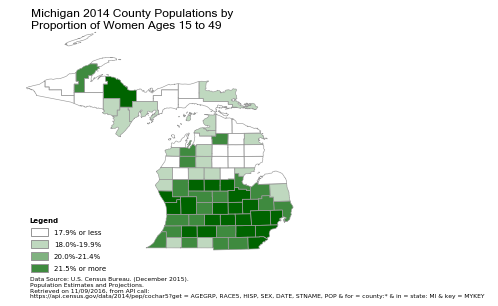

       AGEGRP RACE5 HISP SEX DATE          STNAME    POP state county
0           0     1    1   1    1  North Carolina  49186    37    001
1           1     1    1   1    1  North Carolina   2653    37    001
2           2     1    1   1    1  North Carolina   3032    37    001
3           3     1    1   1    1  North Carolina   3082    37    001
4           4     1    1   1    1  North Carolina   3523    37    001
5           5     1    1   1    1  North Carolina   3431    37    001
6           6     1    1   1    1  North Carolina   2480    37    001
7           7     1    1   1    1  North Carolina   2467    37    001
8           8     1    1   1    1  North Carolina   3100    37    001
9           9     1    1   1    1  North Carolina   3550    37    001
10         10     1    1   1    1  North Carolina   3938    37    001
11         11     1    1   1    1  North Carolina   3869    37    001
12         12     1    1   1    1  North Carolina   3364    37    001
13         13     1 

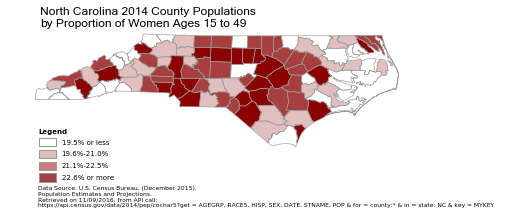

      AGEGRP RACE5 HISP SEX DATE         STNAME    POP state county
0          0     1    1   1    1  Massachusetts  96127    25    001
1          1     1    1   1    1  Massachusetts   3934    25    001
2          2     1    1   1    1  Massachusetts   4443    25    001
3          3     1    1   1    1  Massachusetts   5183    25    001
4          4     1    1   1    1  Massachusetts   5827    25    001
5          5     1    1   1    1  Massachusetts   4732    25    001
6          6     1    1   1    1  Massachusetts   4186    25    001
7          7     1    1   1    1  Massachusetts   3775    25    001
8          8     1    1   1    1  Massachusetts   4355    25    001
9          9     1    1   1    1  Massachusetts   5607    25    001
10        10     1    1   1    1  Massachusetts   7327    25    001
11        11     1    1   1    1  Massachusetts   8089    25    001
12        12     1    1   1    1  Massachusetts   7915    25    001
13        13     1    1   1    1  Massachusetts 

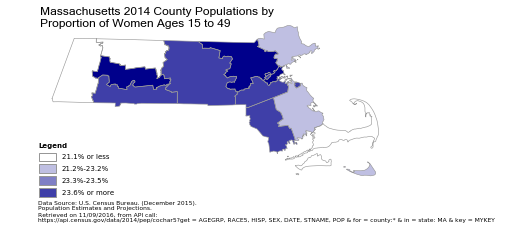

       AGEGRP RACE5 HISP SEX DATE STNAME    POP state county
0           0     1    1   1    1  Texas  19998    48    001
1           1     1    1   1    1  Texas    920    48    001
2           2     1    1   1    1  Texas   1037    48    001
3           3     1    1   1    1  Texas   1007    48    001
4           4     1    1   1    1  Texas   1005    48    001
5           5     1    1   1    1  Texas   1039    48    001
6           6     1    1   1    1  Texas   1239    48    001
7           7     1    1   1    1  Texas   1446    48    001
8           8     1    1   1    1  Texas   1532    48    001
9           9     1    1   1    1  Texas   1616    48    001
10         10     1    1   1    1  Texas   1834    48    001
11         11     1    1   1    1  Texas   1727    48    001
12         12     1    1   1    1  Texas   1516    48    001
13         13     1    1   1    1  Texas   1255    48    001
14         14     1    1   1    1  Texas   1029    48    001
15         15     1    1

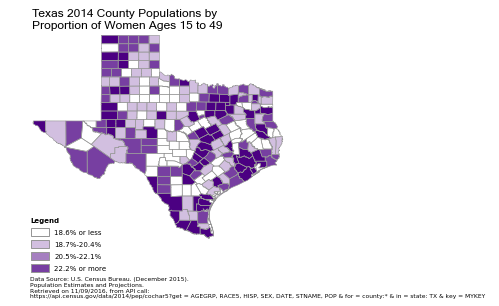

In [16]:
# Download the shapefile info for the state
remotezip = urlopen('http://www2.census.gov/geo/tiger/' +\
                           'GENZ2014/shp/cb_2014_us_county_500k.zip')
zipinmemory = io.BytesIO(remotezip.read())
z = zipfile.ZipFile(zipinmemory)
fn_path = os.path.normpath('%sshapefiles/' % OUTPATH)
z.extractall(fn_path)
bordersfn = os.path.join(fn_path, 'cb_2014_us_county_500k.shp')

states = [key for key in style_dict]
for state in states:
    
    # Get the state info using the us library
    state_fips = us.states.lookup(state).fips
    state_name = us.states.lookup(state).name

    # Get the data table from the census api and crate a datagrame
    url = 'https://api.census.gov/data/2014/pep/cochar5?get=AGEGRP,RACE5,' +\
        'HISP,SEX,DATE,STNAME,POP&for=county:*&in=state' +\
        ':%s&key=%s' % (state_fips, MYTOKEN)
    df = census_call(url)

    # Filter and clean the data
    df = cshp.fix_FIPS(df, 'county', 'state')
    df['POP'] = df['POP'].str.strip().astype(int)
    df = df[df['DATE'] == '6']  # filter to 2014

    # Get the total for each county; here the age group zero is all ages
    total = df[(df['AGEGRP'] == '0')]   # All ages
    total = total.groupby(['FIPS'], as_index=False).aggregate(np.sum)

    # Get the total for each county for women in the specified age group
    df = df[df['SEX'] == '2']  # Women
    df = df[(df['AGEGRP'] == '4') | (df['AGEGRP'] == '5') | (
        df['AGEGRP'] == '6') | (df['AGEGRP'] == '7') | 
        df['AGEGRP'] == '8') | (df['AGEGRP'] == '9') | (
        df['AGEGRP'] == '10')]  # 15 to 49
    df = df.groupby(['FIPS'], as_index=False).aggregate(np.sum)
    
    # Calculate a ratio here; Choroshape can also automatically calculate a ratio
    df.rename(columns={'POP': 'female_15_to_49'}, inplace=True)
    df = pd.merge(left=df, right=total, how='left', on='FIPS')
    df['ratio'] = df['female_15_to_49'].astype(float)/df['POP']
    

    # Creates a geodataframe
    geodf = gpd.GeoDataFrame.from_file(bordersfn)
    geodf = (geodf[geodf['STATEFP'] == state_fips])
    geodf = cshp.fix_FIPS(geodf, 'COUNTYFP', 'STATEFP')

    # Footnote for the map
    footnote = 'Data Source: U.S. Census Bureau. (December 2015).\n    ' +\
               'Population Estimates and Projections.\n    ' +\
               'Retrieved on %s, from API call:\n    ' % TODAY +\
               'https://api.census.gov/data/2014/pep/cochar5?get = AGEGRP, ' +\
               'RACE5, HISP, SEX, DATE, STNAME, POP & for = county:*' +\
               ' & in = state: % s & key = MYKEY' % state
    
    # Creates a dataset object using the Choroshape defaults
    apd = cshp.AreaPopDataset(df, geodf, 'FIPS', 'FIPS',
                         cat_col='ratio',
                         footnote=footnote,
                         cat_name=state + '_Female_15_to_49',
                         title=state_name + ' 2014 County Populations by Proportion of Women Ages 15 to 49',
                         percent_format=True)
    
    # Creates a chstyle object
    chstyle = style_dict[state]
    
    # Creates the map
    chmap = cshp.Choropleth(apd, chstyle, None, OUTPATH, False, True)
    
#     Plots the map
    chmap.plot()